<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [5]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [7]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [8]:
boston_df=pd.read_csv(boston_url)
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [9]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


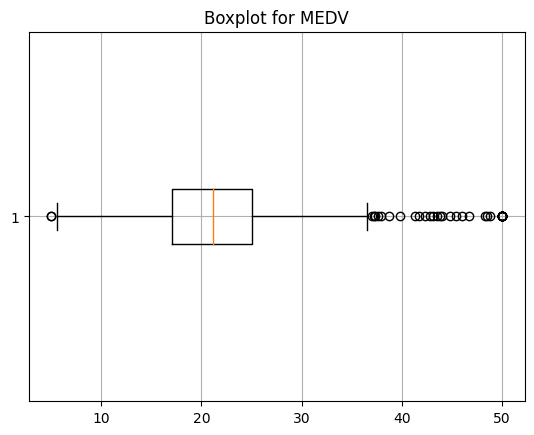

In [10]:
pyplot.boxplot(boston_df.MEDV, manage_ticks=True, vert=False);
pyplot.title("Boxplot for MEDV");
pyplot.grid()

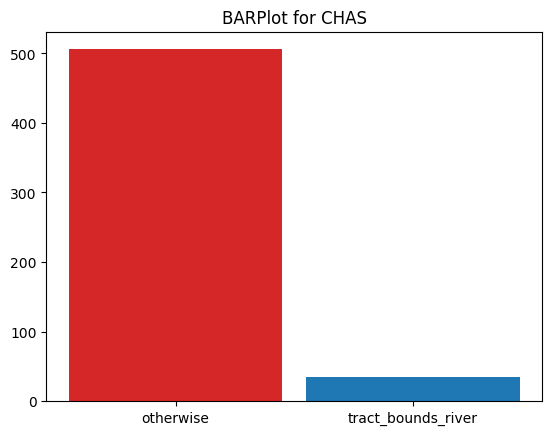

In [12]:
chas = ['otherwise', 'tract_bounds_river']
counts = (boston_df.CHAS.count(), boston_df.CHAS.sum());
bar_colors = ['tab:red', 'tab:blue']

#pyplot.bar(chas, counts, label=bar_labels, color=bar_colors, width =0.9);
pyplot.bar(chas, counts, color=bar_colors, width =0.9);

pyplot.title("BARPlot for CHAS");

In [35]:
boston_df.MEDV[(boston_df.AGE > 26) & (boston_df.AGE < 45)]


12     21.7
16     23.1
18     20.2
37     21.0
38     24.7
       ... 
353    30.1
483    21.8
484    20.6
494    24.5
495    23.1
Name: MEDV, Length: 76, dtype: float64

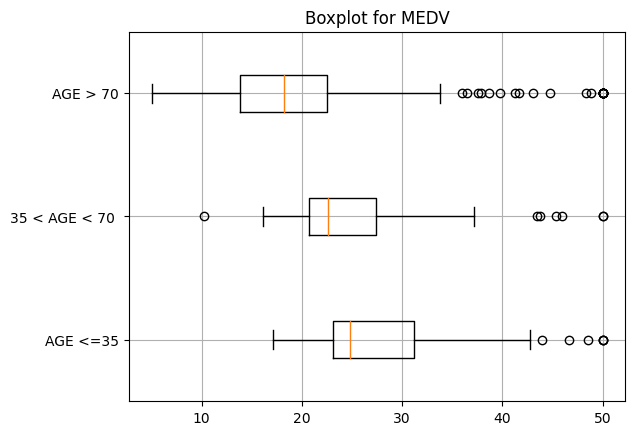

In [42]:
for_box = [boston_df.MEDV[boston_df.AGE <= 35],boston_df.MEDV[(boston_df.AGE > 35) & (boston_df.AGE < 70)], boston_df.MEDV[boston_df.AGE >= 70]];
pyplot.boxplot(for_box, manage_ticks=True, vert=False);
pyplot.title("Boxplot for MEDV");
pyplot.yticks([1, 2, 3], ['AGE <=35', '35 < AGE < 70 ', 'AGE > 70'])
pyplot.grid()

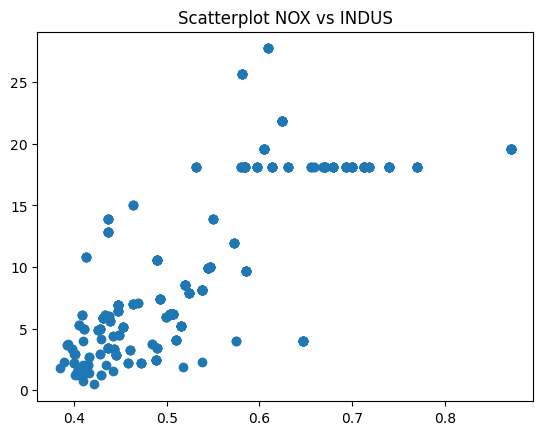

In [45]:
pyplot.scatter(boston_df.NOX, boston_df.INDUS)
pyplot.title("Scatterplot NOX vs INDUS");


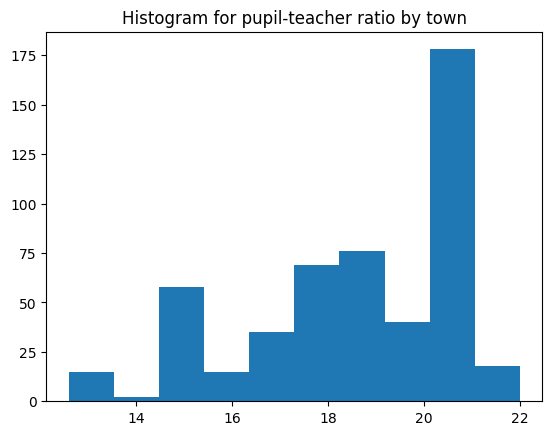

In [49]:
pyplot.hist(boston_df.PTRATIO)
pyplot.title("Histogram for pupil-teacher ratio by town");

#  T-Test for: 
## Is there a significant difference in median value of houses bounded by the Charles river or not?
### Null hypothesis: there is no significant difference between MEDV of houses bounded and nonbounded to Charles river

In [92]:
t_stat, p_value = scipy.stats.ttest_ind(boston_df.MEDV[boston_df.CHAS == 0], boston_df.MEDV[boston_df.CHAS > 0])
print('alpha = ', alpha)
print('p_value =', p_value)
alpha = 0.05
# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis; there is a significant difference between MEDV of houses bounded and nonbounded to Charles river.")
else:
    print("Fail to reject the null hypothesis; there is no significant difference between MEDV of houses bounded and nonbounded to Charles river.")
 

alpha =  0.05
p_value = 7.390623170519905e-05
Reject the null hypothesis; there is a significant difference between MEDV of houses bounded and nonbounded to Charles river.


# ANOVA TEST
## Null hypothesis: there is no significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)

In [93]:
f, p_value = scipy.stats.f_oneway(boston_df.MEDV[boston_df.AGE <= 35],boston_df.MEDV[(boston_df.AGE > 35) & (boston_df.AGE < 70)], boston_df.MEDV[boston_df.AGE >= 70])
print('alpha = ', alpha)
print('p_value =', p_value)
# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis; there is a significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)")
else:
    print("Fail to reject the null hypothesis; there is no significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)")
 

alpha =  0.05
p_value = 1.7105011022702984e-15
Reject the null hypothesis; there is a significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)


# Pearson Correlation
## Null hypothesis: there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

In [103]:
stst, p_value = scipy.stats.pearsonr(boston_df.NOX, boston_df.INDUS)
print('p_value =', p_value)
if p_value < alpha:
    print("Reject the null hypothesis; there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town")
else:
    print("Fail to reject the null hypothesis; there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town")
 

p_value = 7.913361061210442e-98
Reject the null hypothesis; there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town


# Regression analysis for:
## What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes?

In [106]:
res = scipy.stats.linregress(boston_df.MEDV, boston_df.DIS)
res

LinregressResult(slope=0.057222084397420284, intercept=2.505668542558049, rvalue=0.2499287340859039, pvalue=1.2066117273371223e-08, stderr=0.009874749928003143, intercept_stderr=0.2402928466940379)